https://github.com/alejo-cuello/first-steps-data-science/blob/logistic-regression/01.ipynb

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import statsmodels.api as sm

In [112]:
try:
    session_info_output = session_info.show()
except Exception as error:
    print("The session info has been requested already:")
    
session_info_output

The session info has been requested already:


In [113]:
import janitor # This library generates an error when I execute session_info()

# Import external files

- Extension of the "missing" functions from Pandas
- DataFrame and dictionary functions
- Statistical functions

In [114]:
%run utils/u.0.0-pandas_missing_extension.ipynb
%run utils/u.0.1-df_functions.ipynb
%run utils/u.0.2-statistical-functions.ipynb

# Get the processed data (V3)

In [115]:
arg_di_df_processed = pd.read_csv('../data/processed/WDICSV_PROCESSED_V3.csv').clean_names(case_type="snake")

print(arg_di_df_processed.shape)
arg_di_df_processed.info()

(54, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ny_gdp_mktp_kd_zg_cat   54 non-null     float64
 1   sp_dyn_le00_in_cat      54 non-null     float64
 2   ny_gdp_pcap_kd_cat      54 non-null     float64
 3   se_sec_enrr_cat         54 non-null     float64
 4   ny_gdp_mktp_kd_grw_cat  54 non-null     float64
 5   it_cel_sets_cat         54 non-null     float64
 6   year                    54 non-null     float64
 7   it_mlt_main             54 non-null     float64
 8   ny_gdp_pcap_kd          54 non-null     float64
 9   sp_dyn_le00_in          53 non-null     float64
 10  sh_dth_imrt             54 non-null     float64
 11  sm_pop_refg             54 non-null     float64
 12  sm_pop_refg_or          54 non-null     float64
 13  se_pre_enrr             54 non-null     float64
 14  se_sec_enrr             54 non-null

# Get columns names and types

In [116]:
indicators_names, categorical_cols, numeric_cols, columns_with_missing_values = get_columns(arg_di_df_processed, True)

In [117]:
print(f'Total Columns: {len(indicators_names)}')
print(f'Categorical Columns: {len(categorical_cols)}')
print(f'Numeric Columns: {len(numeric_cols)}')

numeric_cols = list(numeric_cols)

Total Columns: 19
Categorical Columns: 6
Numeric Columns: 13


In [118]:
arg_di_df_processed.dtypes

ny_gdp_mktp_kd_zg_cat     float64
sp_dyn_le00_in_cat        float64
ny_gdp_pcap_kd_cat        float64
se_sec_enrr_cat           float64
ny_gdp_mktp_kd_grw_cat    float64
it_cel_sets_cat           float64
year                      float64
it_mlt_main               float64
ny_gdp_pcap_kd            float64
sp_dyn_le00_in            float64
sh_dth_imrt               float64
sm_pop_refg               float64
sm_pop_refg_or            float64
se_pre_enrr               float64
se_sec_enrr               float64
sp_urb_totl_in_zs         float64
year_of_dictatorship      float64
it_cel_sets_pct           float64
dem_dep_pct               float64
dtype: object

In [119]:
indicators_names

['ny_gdp_mktp_kd_zg_cat, GDP growth categories',
 'sp_dyn_le00_in_cat, Life Expectancy categories',
 'ny_gdp_pcap_kd_cat, GDP Per Capita Categories',
 'se_sec_enrr_cat, Secondary school enrollment categories',
 'ny_gdp_mktp_kd_grw_cat, GDP Growth Volatility',
 'it_cel_sets_cat, Mobile Subscription Categories',
 'year, Year',
 'it_mlt_main, Fixed telephone subscriptions',
 'ny_gdp_pcap_kd, GDP per capita (constant 2015 US$)',
 'sp_dyn_le00_in, Life expectancy at birth, total (years)',
 'sh_dth_imrt, Number of infant deaths',
 'sm_pop_refg, Refugee population by country or territory of asylum',
 'sm_pop_refg_or, Refugee population by country or territory of origin',
 'se_pre_enrr, School enrollment, preprimary (% gross)',
 'se_sec_enrr, School enrollment, secondary (% gross)',
 'sp_urb_totl_in_zs, Urban population (% of total population)',
 'year_of_dictatorship, It was a year of military dictatorship',
 'it_cel_sets_pct, Mobile Subscription (% of total population)',
 'dem_dep_pct, Perce

In [120]:
columns_with_missing_values

['sp_dyn_le00_in']

# Split target variable

Target variable: sp_dyn_le00_in (Life expectancy at birth, total (years))

In [121]:
target_variable = "year_of_dictatorship"
target_variable_name = get_indicator_name(target_variable, True)

In [122]:
if target_variable in numeric_cols:
    numeric_cols.remove(target_variable)
    
if 'year' in numeric_cols:
    numeric_cols.remove('year')

## Impute other variables with missing values

In [123]:
arg_di_df_processed[numeric_cols] = impute_with_mice(arg_di_df_processed, target_variable, numeric_cols)

## Split rows with missing values in the target variable

In [124]:
rows_with_na = arg_di_df_processed[arg_di_df_processed[target_variable].isna()].copy()
rows_with_na

,ny_gdp_mktp_kd_zg_cat,sp_dyn_le00_in_cat,ny_gdp_pcap_kd_cat,se_sec_enrr_cat,ny_gdp_mktp_kd_grw_cat,it_cel_sets_cat,year,it_mlt_main,ny_gdp_pcap_kd,sp_dyn_le00_in,sh_dth_imrt,sm_pop_refg,sm_pop_refg_or,se_pre_enrr,se_sec_enrr,sp_urb_totl_in_zs,year_of_dictatorship,it_cel_sets_pct,dem_dep_pct


In [125]:
X = arg_di_df_processed.drop(index=rows_with_na.index)[numeric_cols]
y = arg_di_df_processed.drop(index=rows_with_na.index)[target_variable]

X.shape, y.shape

((54, 11), (54,))

# Check correlation with target variable

<Axes: >

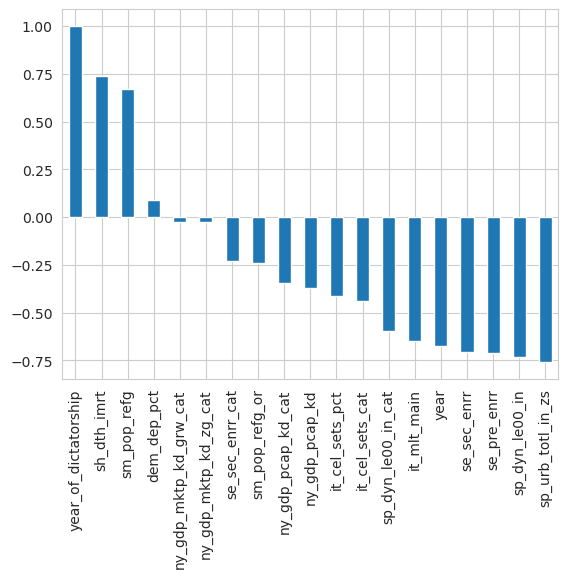

In [126]:
arg_di_df_processed.corr()['year_of_dictatorship'].sort_values(ascending=False).plot(kind="bar")

# Apply Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
def logistic_model(C_, solver_, multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver=solver_, multi_class=multiclass_, n_jobs=-1, C=C_)
    return logistic_regression_model


In [153]:
multiclass = ['ovr']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params = []
for i in multiclass:
    for j in solver_list:
        model = logistic_model(1,j,i)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        params.append(i + "-" + j)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        # try:
        # except:
        #     print('explota')
        #     None


/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
Process LokyProcess-11:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/en

KeyboardInterrupt: 

In [141]:
scores

[]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

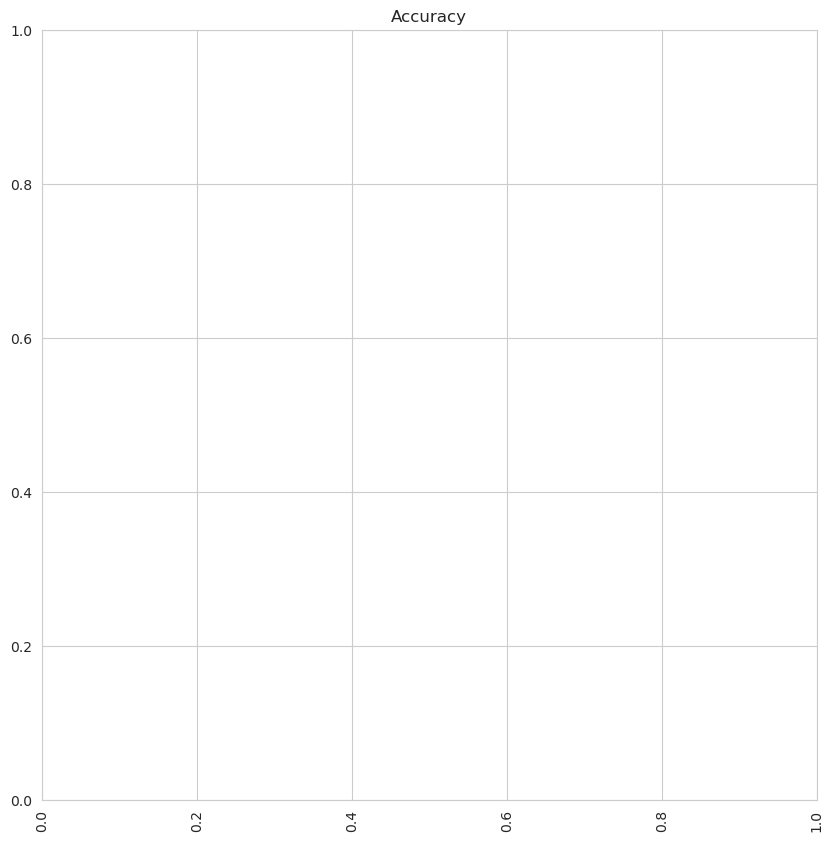

In [140]:

fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title("Accuracy")
plt.xticks(rotation=90)

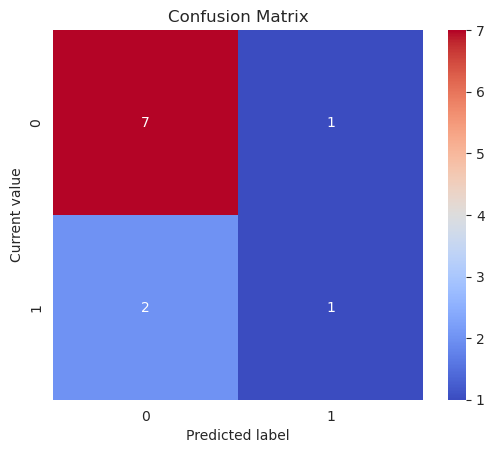

In [ ]:
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
sns.heatmap(cm, annot=True, square=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.ylabel('Current value')
plt.xlabel('Predicted label')
plt.show()

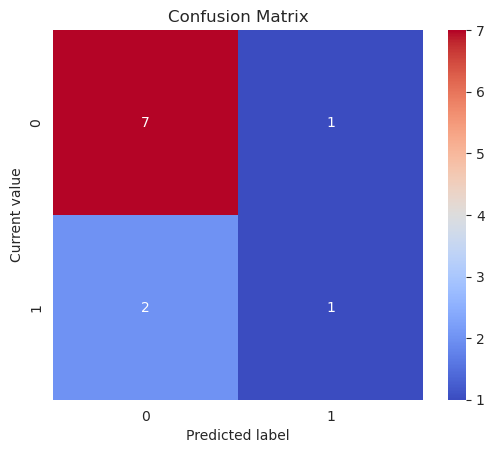

In [ ]:
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
sns.heatmap(cm, annot=True, square=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.ylabel('Current value')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(metrics.accuracy_score(y_test, prediction_test))

0.7272727272727273


In [ ]:
print(model.predict_proba(X_test))

[[9.08149000e-01 9.18509996e-02]
 [9.99472767e-01 5.27232676e-04]
 [9.99529758e-01 4.70242160e-04]
 [6.10119746e-01 3.89880254e-01]
 [9.99235687e-01 7.64312878e-04]
 [1.19356493e-01 8.80643507e-01]
 [8.94572587e-01 1.05427413e-01]
 [9.99202152e-01 7.97848230e-04]
 [7.64545058e-02 9.23545494e-01]
 [9.95787713e-01 4.21228716e-03]
 [6.77501917e-01 3.22498083e-01]]


In [ ]:
print(model.coef_)

[[-0.41765581  0.09001112 -0.44547325  0.59075811  0.18511257  0.01646954
  -0.48200604 -0.73285934 -0.67448794 -0.05422873  0.02124876]]


In [ ]:
print(model.feature_names_in_)

['it_mlt_main' 'ny_gdp_pcap_kd' 'sp_dyn_le00_in' 'sh_dth_imrt'
 'sm_pop_refg' 'sm_pop_refg_or' 'se_pre_enrr' 'se_sec_enrr'
 'sp_urb_totl_in_zs' 'it_cel_sets_pct' 'dem_dep_pct']


In [ ]:
weights = pd.Series(model.coef_[0], index=X.columns.values)